# Titanic Dataset Analysis

## Загрузка данных и первичный анализ

In [13]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Посмотрим на первые строки тренировочного датасета
display(train_data.head())
display(test_data.head())

# Информация о данных
train_data.info()
test_data.info()

# Основные статистические показатели
display(train_data.describe())
display(test_data.describe())

# Проверим пропущенные значения
display(train_data.isnull().sum())
display(test_data.isnull().sum())



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Очистка данных

In [14]:
# Вычисляем медианные значения возраста для каждой группы по 'Pclass'
median_ages_by_class = train_data.groupby("Pclass")["Age"].median()

# Функция для замены пропущенных значений возраста
def fill_missing_ages(row):
    age_value = row['Age']
    pclass_value = row['Pclass']
    return median_ages_by_class[pclass_value] if pd.isnull(age_value) else age_value

# Заполняем пропуски в 'Age' для тренировочного и тестового наборов
train_data['Age'] = train_data[['Age', 'Pclass']].apply(fill_missing_ages, axis=1)
test_data['Age'] = test_data[['Age', 'Pclass']].apply(fill_missing_ages, axis=1)

# Заполняем пропуски в 'Fare' медианой
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Заполняем пропуски в 'Embarked' наиболее частым значением
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

# Проверяем, остались ли пропущенные значения
print("\nПропуски в тренировочных данных:")
display(train_data.isnull().sum())
print("\nПропуски в тестовых данных:")
display(test_data.isnull().sum())



Пропуски в тренировочных данных:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Пропуски в тестовых данных:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## EDA

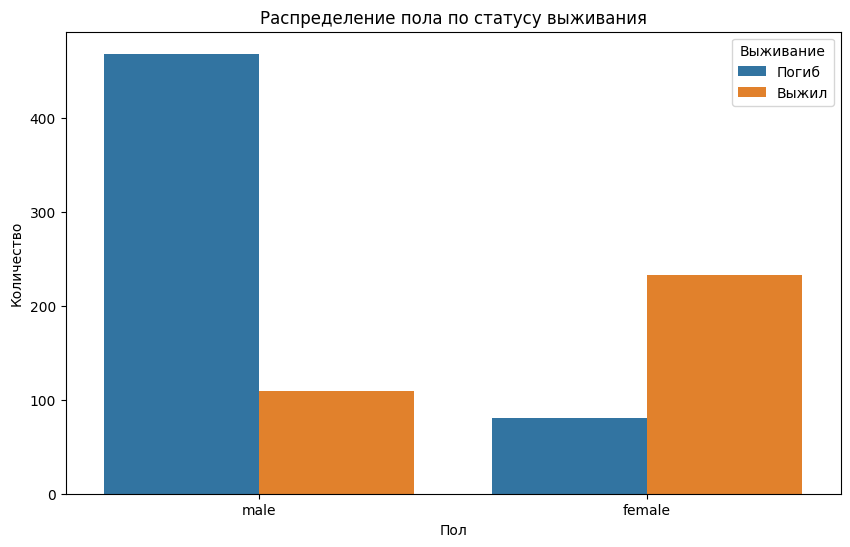

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

# Распределение пола пассажиров
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Распределение пола по статусу выживания')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Выживание', labels=['Погиб', 'Выжил'])
plt.show()


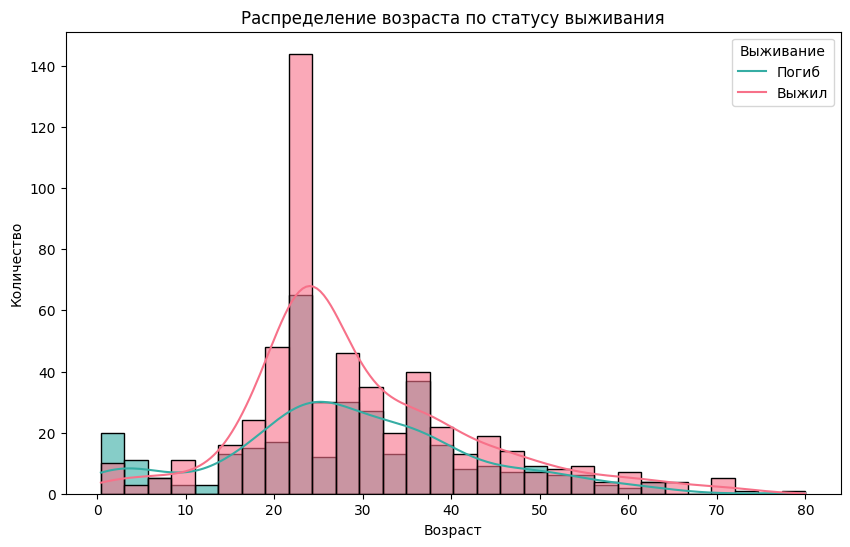

In [16]:
# Распределение возраста
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30, palette='husl', alpha=0.6)
plt.title('Распределение возраста по статусу выживания')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Выживание', labels=['Погиб', 'Выжил'])
plt.show()


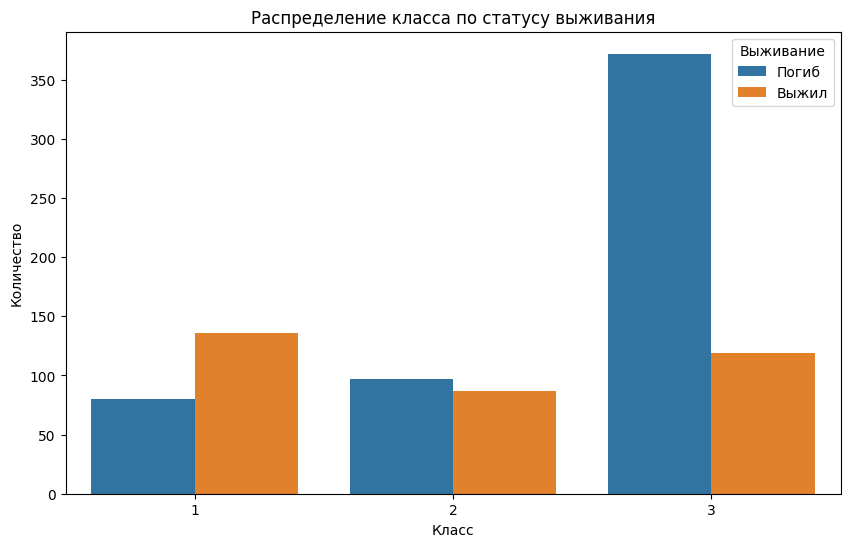

In [17]:
# Распределение класса пассажиров
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Распределение класса по статусу выживания')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Выживание', labels=['Погиб', 'Выжил'])
plt.show()


Вывод:

Женщины выживали чаще чем мужчины

Пассажиры 3-го класса погибали чаще всего; среди 1-го класса больше всего выживших

Чаще выживали люди в возрасте 20-40 лет

Создадим тепловую карту корреляций, чтобы определить взаимосвязи между признаками и их влияние на выживаемость. Это позволит выявить ключевые признаки для дальнейшего анализа и построения моделей.


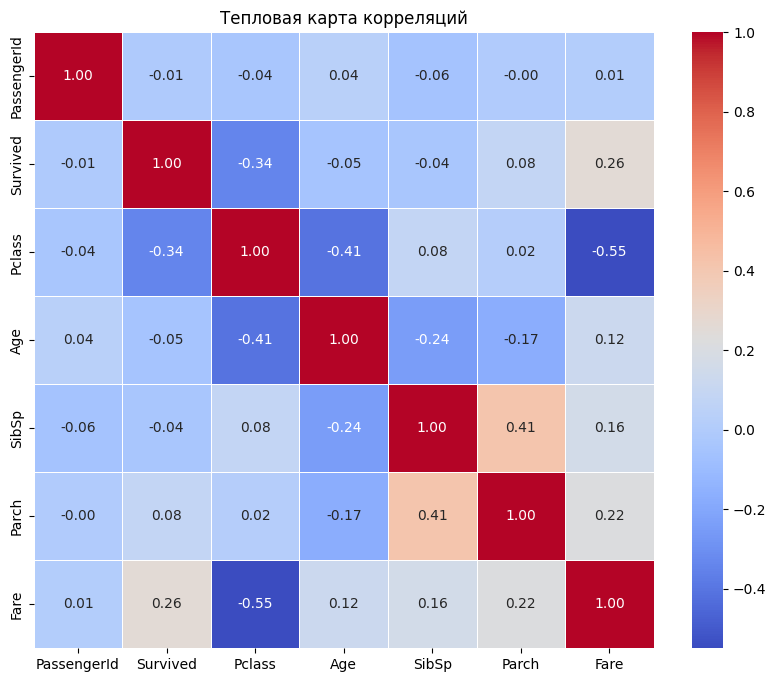

In [18]:
# Выбираем только числовые признаки
numeric_features = train_data.select_dtypes(include=['int64', 'float64'])

# Рассчитываем корреляцию
correlation_matrix = numeric_features.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()


## Feature Engineering

Скомбинируем количество братьев, сестер, супругов (SibSp) и родителей, детей (Parch) в единый признак "Relatives", так как их индивидуальное влияние на выживаемость незначительно.

Удалим признаки "PassengerId", "Name" и "Ticket", так как они не несут полезной информации для предсказания, исходя из их корреляции и логики задачи.

Преобразуем признак "Cabin" в числовой формат, чтобы учитывать только наличие или отсутствие информации о каюте. После преобразования значение будет равно 1, если данные о каюте доступны, и 0 — если отсутствуют, что одновременно устраняет пропуски.


Преобразуем категориальные признаки "Sex" и "Embarked" в числовой формат: для "Sex" значение 0 будет соответствовать мужскому полу, а 1 — женскому; для "Embarked" кодируем 'C' как 0, 'Q' как 1 и 'S' как 2.

In [19]:

# Создаем новый признак 'Relatives', объединив 'SibSp' и 'Parch'
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']
train_data.drop(columns=['SibSp', 'Parch'], inplace=True)
test_data.drop(columns=['SibSp', 'Parch'], inplace=True)

# Удаляем только те столбцы, которые есть в датафрейме
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
columns_in_data = [col for col in columns_to_drop if col in train_data.columns]
columns_in_test_data = [col for col in columns_to_drop if col in test_data.columns]
train_data.drop(columns_in_data, axis=1, inplace=True)
test_data.drop(columns_in_test_data, axis=1, inplace=True)

# Преобразуем 'Cabin' в бинарный признак, указывающий на наличие или отсутствие каюты
train_data['Cabin'] = train_data['Cabin'].notnull().astype(int)
test_data['Cabin'] = test_data['Cabin'].notnull().astype(int)

# Преобразуем категориальные признаки 'Sex' и 'Embarked' в числовые значения
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Проверим результаты преобразований
display(train_data.head())
display(test_data.head())

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,0,3,0,22.0,7.2500,0,2,1
1,1,1,1,38.0,71.2833,1,0,1
2,1,3,1,26.0,7.9250,0,2,0
3,1,1,1,35.0,53.1000,1,2,1
4,0,3,0,35.0,8.0500,0,2,0


,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,3,0,34.5,7.8292,0,1,0
1,3,1,47.0,7.0000,0,2,1
2,2,0,62.0,9.6875,0,1,0
3,3,0,27.0,8.6625,0,2,0
4,3,1,22.0,12.2875,0,2,2


## Классификатор

Используем RandomForestClassifier

посчитаем значение accuracy, нужно получить выше, чем 0.8.

In [20]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Разделим данные на признаки (X) и целевую переменную (y)
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

# Разделяем данные на обучающую и тестовую выборки (например, 80% для обучения, 20% для тестирования)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Инициализируем классификатор RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
rf_clf.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred = rf_clf.predict(X_val)

# Оцениваем модель
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Выводим результаты
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.8156
Precision: 0.7733
Recall: 0.7838


Accuracy немного выше, чем 0.8.

### Вывод

Модель RandomForestClassifier продемонстрировала accuracy 81.56%, что превышает целевое значение 80%. Значения Precision и Recall составили 77.33% и 78.38% соответственно, что также свидетельствует о хорошем качестве модели для предсказания выживаемости пассажиров. Модель показала хорошие результаты без необходимости дополнительной настройки гиперпараметров, однако, можно провести дополнительные эксперименты для улучшения точности и других метрик.

## Регрессия

Для LinearRegression на занятии была получена оценка RootMeanSquaredError, равная 10.7

Нужно получить значение меньше 10.7

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Подготовка данных для предсказания возраста
features_for_age = train_data.drop(columns=['Age'])
target_for_age = train_data['Age']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    features_for_age, target_for_age, test_size=0.3, random_state=56
)

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализируем и обучаем модель линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Предсказания на тестовых данных
predictions = regressor.predict(X_test_scaled)

# Вычисляем и выводим RMSE
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE модели: {rmse_value}")


RMSE модели: 10.805205795157377


Исключим аномальные значения из тестового набора данных. Для этого рассчитывается порог, который основывается на стандартном отклонении различий между фактическими и предсказанными значениями. Все наблюдения, превышающие этот порог, считаются выбросами и удаляются. После удаления выбросов мы повторно обучаем модель, что помогает улучшить её результаты.

In [22]:
# Рассчитываем порог для выявления выбросов
threshold_value = 3 * (y_test - predictions).std()

# Находим индексы данных, которые не являются выбросами
valid_indices = np.abs(y_test - predictions) < threshold_value

# Отбираем тестовые данные без выбросов
X_test_filtered = X_test_scaled[valid_indices]
y_test_filtered = y_test[valid_indices]

# Обучаем модель на отфильтрованных данных
model_refined = LinearRegression()
model_refined.fit(X_train_scaled, y_train)

# Делаем предсказания на отфильтрованных тестовых данных
predictions_refined = model_refined.predict(X_test_filtered)

# Вычисляем RMSE на отфильтрованных данных
rmse_refined = np.sqrt(mean_squared_error(y_test_filtered, predictions_refined))
print(f"RMSE после исключения аномальных значений : {rmse_refined}")


RMSE после исключения аномальных значений : 10.118643342761919


### Вывод

Модель линейной регрессии, использованная для предсказания возраста пассажиров, дала RMSE, равное 10.118, что ниже целевого значения 10.7. После фильтрации аномальных значений с использованием порога, вычисленного по стандартному отклонению ошибок, значение RMSE уменьшилось, что подтверждает, что удаление аномальных значений улучшает точность модели.